In [178]:
from importlib import reload
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
import mylstm; reload(mylstm)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/pytorch-tutorial/classify-names/utils.py'>

In [151]:
data_dir = '/home/taot/data/AI/pytorch-tutorial/data/names/'
loader = utils.DataLoader(data_dir)
category, line, category_tensor, line_tensor = loader.randomTrainingExample()

In [152]:
rnn = mylstm.LSTM(input_size=utils.n_letters, hidden_size=loader.n_categories)

In [153]:
hidden, cell = rnn.initHidden()
input = line_tensor[0]
output, hidden, cell = rnn.forward(input, hidden, cell)

In [154]:
output.shape

torch.Size([1, 18])

In [155]:
hidden.shape

torch.Size([1, 18])

In [157]:
loader.categoryFromOutput(output)

('Dutch', 5)

## Experiments

In [55]:
line

'Rietveld'

In [56]:
line_tensor[0].shape

torch.Size([1, 57])

In [127]:
criterion = nn.NLLLoss()
learning_rate = 0.005

In [141]:
mylstm.train(rnn, category_tensor, line_tensor, criterion, learning_rate)

(Variable containing:
 
 Columns 0 to 9 
 1.00000e-02 *
  -3.0408 -2.3203  3.4312  1.5469 -7.7077  4.7871 -1.0142  1.7977  5.3026 -1.8498
 
 Columns 10 to 17 
 1.00000e-02 *
   1.8300  4.2528  3.0323 -1.2079 -3.5052  2.6289  5.6848 -2.2461
 [torch.FloatTensor of size 1x18], -0.015468631871044636)

## Training

In [220]:
criterion = nn.NLLLoss()
learning_rate = 0.1
rnn = mylstm.LSTM(input_size=utils.n_letters, hidden_size=loader.n_categories)

In [235]:
learning_rate = 0.01

In [236]:
import time
import math

n_iters = 100000
print_every = 2000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = loader.randomTrainingExample()
    output, loss = mylstm.train(rnn, category_tensor, line_tensor, criterion, learning_rate)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = loader.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

2000 2% (0m 4s) 1.7193 Milligan / Irish ✓
4000 4% (0m 9s) 1.7132 Ganim / Arabic ✓
6000 6% (0m 14s) 2.9480 Fleming / Irish ✗ (Scottish)
8000 8% (0m 19s) 1.8992 Masudu / French ✗ (Japanese)
10000 10% (0m 23s) 2.4353 Andrysiak / Czech ✗ (Polish)
12000 12% (0m 28s) 1.8276 Bertrand / English ✗ (French)
14000 14% (0m 33s) 1.8884 Garcia / Italian ✗ (Portuguese)
16000 16% (0m 37s) 1.8955 Reid / French ✗ (Scottish)
18000 18% (0m 42s) 1.9977 Timmins / English ✓
20000 20% (0m 47s) 1.7104 Stevenson / Scottish ✓
22000 22% (0m 52s) 2.5171 San nicolas / Greek ✗ (Spanish)
24000 24% (0m 56s) 1.5460 Kattan / Arabic ✓
26000 26% (1m 1s) 1.7099 Stoep / Dutch ✓
28000 28% (1m 6s) 1.7897 Blecher / German ✓
30000 30% (1m 11s) 1.6316 Zeng / Chinese ✓
32000 32% (1m 16s) 1.9632 Chung / Chinese ✗ (Vietnamese)
34000 34% (1m 20s) 1.9301 Neil / Irish ✓
36000 36% (1m 25s) 1.4531 Hazanov / Russian ✓
38000 38% (1m 29s) 1.7296 Lim / Korean ✗ (Chinese)
40000 40% (1m 34s) 1.7944 An / Vietnamese ✓
42000 42% (1m 39s) 1.7384 

## Evaluation

In [208]:
import mylstm; reload(mylstm)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/pytorch-tutorial/classify-names/utils.py'>

In [234]:
mylstm.predict(rnn, loader, 'Ang')


> Ang
(-1.76) Chinese
(-1.93) Korean
(-2.17) Vietnamese


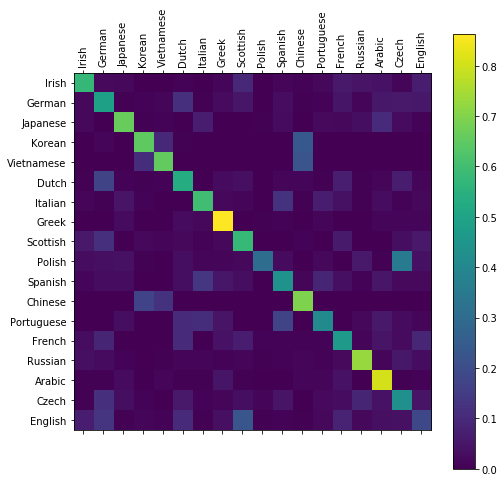

In [237]:
mylstm.show_confusion_matrix(rnn, loader)

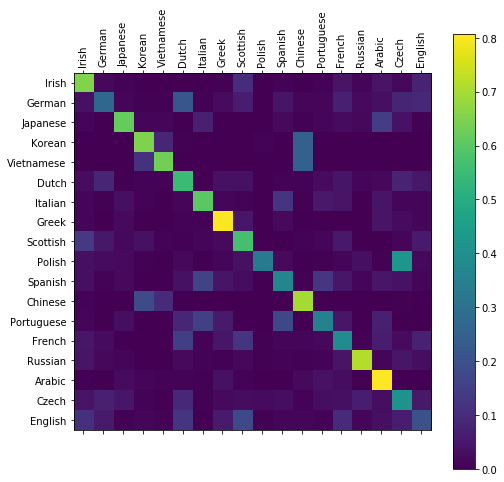

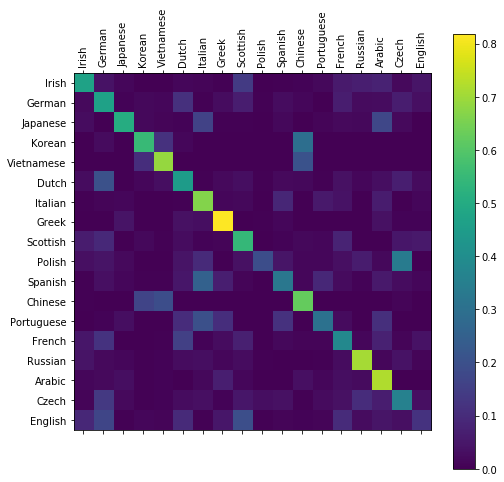

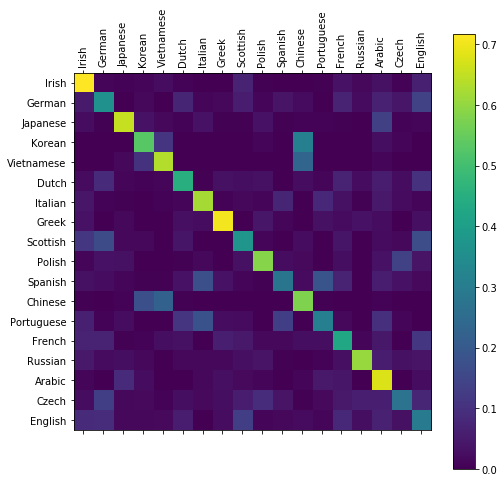